## Analysis of _Around the World in 80 days_
### Author: __Sam Lyddon__
### Date: __19/08/2019__
***

This analysis uses entity recognition to extract the locations travelled to within the book _Around the World in 80 days_, and to compare them against the more general route locations obtained through manual extraction.

In [1]:
import os
from collections import Counter

from src import RequestHandler, Document

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
rq = RequestHandler()

In [4]:
# scrape the text from a web source
# save to local file
data_path = "./data/pg103.txt"
book_path = "http://www.gutenberg.org/cache/epub/103/pg103.txt"
if not os.path.isfile(data_path):
    text = rq.scrape_text(book_path)
    with open(data_path, "wb") as file:
        file.write(text.encode("utf-8"))
else:
    with open(data_path) as file:
        text = file.read()

#### Read document
***

Parse the document into chapters and paragraphs. Extract metadata.

In [5]:
doc = Document(text)
print(f"{doc.title} - {doc.author} - {doc.release_date} - {doc.last_updated} - {doc.language}")

Around the World in 80 Days - Jules Verne - May 15, 2008 [EBook #103] - May 5, 2012 - English


In [6]:
print(f"{len(doc.chapters)} chapters, {len(doc.paragraphs)} paragraphs")

37 chapters, 1605 paragraphs


In [7]:
print(f"5 most mentioned characters: {[name for name, count in sorted(Counter([person for p in doc.paragraphs for person in p.people]).items(), key = lambda x: x[1], reverse=True)][:5]}")

5 most mentioned characters: ['Fogg', 'Aouda', 'Passepartout', 'Francis', 'Fix']


#### Extract locations
***
Perform entity recognition on paragraphs to extract locations. Include whether the protagonist "Fogg" has been mentioned in the paragraph. Send location to OpenStreetMap to get coordinates.

In [8]:
locations = doc.get_locations()

### Plot route
***

Markers are scaled according to the number of occurances of the location.

Colour according to whether Fogg has been mentioned in the paragraph.

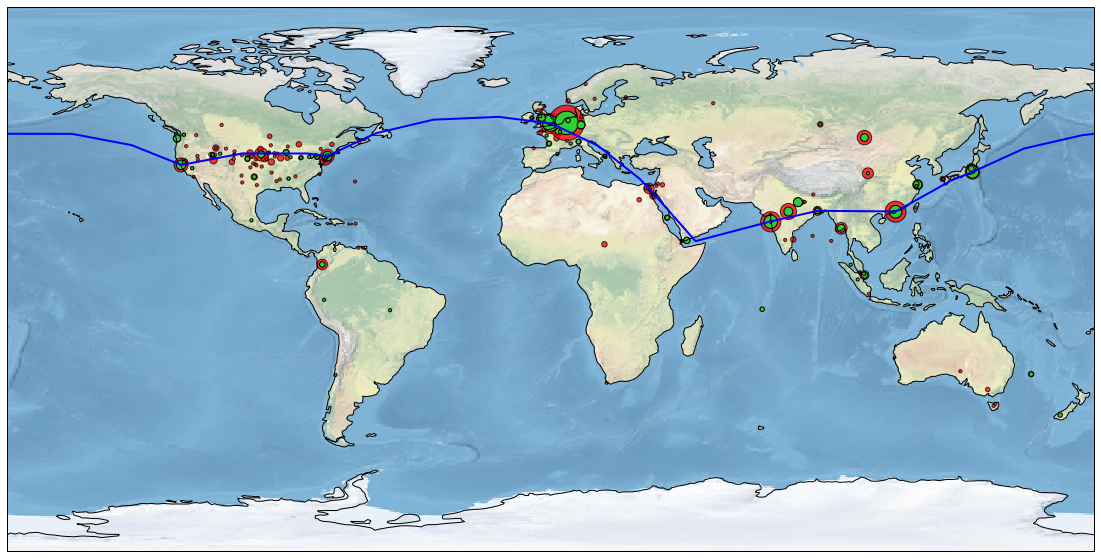

In [9]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# manually retrieved route
lat = [51.5074, 29.9668, 12.5331, 19.0760, 22.5726, 22.3193, 35.4437, 37.7749, 40.7128, 51.5074]
lon = [0.1278, 32.5498, 47.9224, 72.8777, 88.3639, 114.1694, 139.6380, -122.4194, -74.0060, 0.1278]

ax.scatter(
    [loc['lon'] for loc in locations if not loc["has_fogg"]],
    [loc['lat'] for loc in locations if not loc["has_fogg"]],
    s = [loc['count']*10 for loc in locations if not loc["has_fogg"]],
    marker = "o",
    edgecolors = "black",
    color = "red",
    alpha = 0.75,
    transform=ccrs.PlateCarree()
)
ax.scatter(
    [loc['lon'] for loc in locations if loc["has_fogg"]],
    [loc['lat'] for loc in locations if loc["has_fogg"]],
    s = [loc['count']*10 for loc in locations if loc["has_fogg"]],
    marker = "o",
    edgecolors = "black",
    color = "limegreen",
    transform=ccrs.PlateCarree()
)
ax.plot(
    lon, 
    lat, 
    color='blue', 
    linewidth=2,
    transform=ccrs.Geodetic()
)

ax.coastlines()
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.show()

### TODO
***
Improve use of contextual information e.g. surrounding paragraphs to:
    * attribute places to people
    * attribute times to places
